# Temperature Forecast Project using ML
Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



In [1484]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [1485]:
#loading data
df=pd.read_csv("temp_p.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [1486]:
#checking shape
df.shape

(7752, 25)

In [ ]:
#there are 7725 rows and 25 columns

In [1487]:
#checking for null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [ ]:
#as there are very few null values, we will drop all the rows with null values

In [1494]:
#droping null values
df.dropna(inplace=True)

In [1495]:
#checking for null values
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
year                0
month               0
Day                 0
dtype: int64

In [1488]:
#checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [ ]:
#apart from 1 column all the data are float

In [1489]:
#Converting the Date_of_journey into date, month and year.
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

In [1490]:
#droping date
df.drop("Date",axis=1,inplace=True)

In [1492]:
#checking for unique values in each columns
df.apply(lambda x:len(x.unique()))

station               26
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7673
LDAPS_RHmax         7665
LDAPS_Tmax_lapse    7676
LDAPS_Tmin_lapse    7676
LDAPS_WS            7676
LDAPS_LH            7676
LDAPS_CC1           7570
LDAPS_CC2           7583
LDAPS_CC3           7600
LDAPS_CC4           7525
LDAPS_PPT1          2813
LDAPS_PPT2          2511
LDAPS_PPT3          2357
LDAPS_PPT4          1919
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            184
Next_Tmin            158
year                   6
month                 13
Day                   22
dtype: int64

In [1496]:
#using describe function
pd.set_option('display.max_columns', None) # too see all the columns
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,Day
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,2014.991697,7.068134,16.337375
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,1.410877,2.242389,8.216880
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.000000


In [ ]:
#there are positive and negative skewness in many of the columns
#there are huge ouliers presnet in the LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4 as there is huge difference bewtween 75 percentile value and max value
#the beighning year is 2014 and ending year is 2017


In [1497]:
#craeting a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(10,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

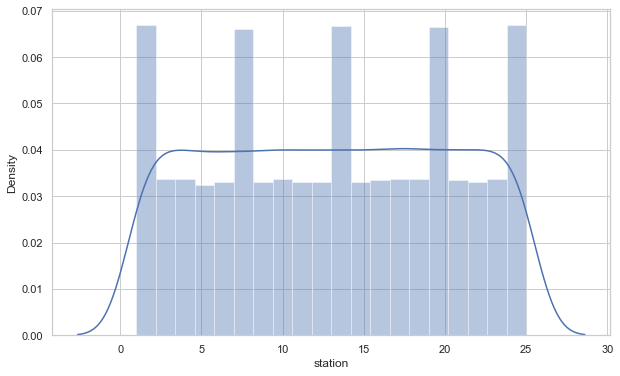

In [1499]:
#station
histogram(df,"station")

In [1500]:
#the station ranges from 0 to 25. there are 5 station which frequency is double than others

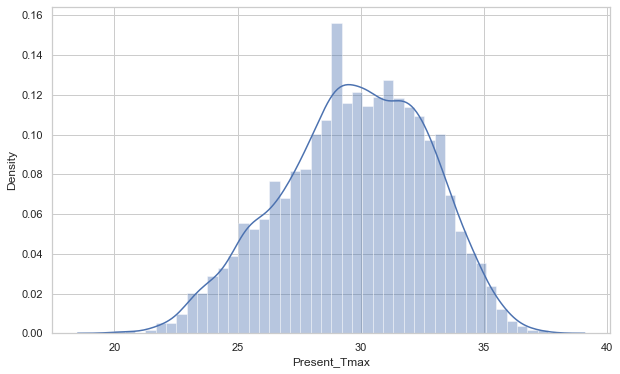

In [1501]:
#Present_Tmax
histogram(df,"Present_Tmax")

In [1502]:
#the data is left skwed with peak value from 28 to 33

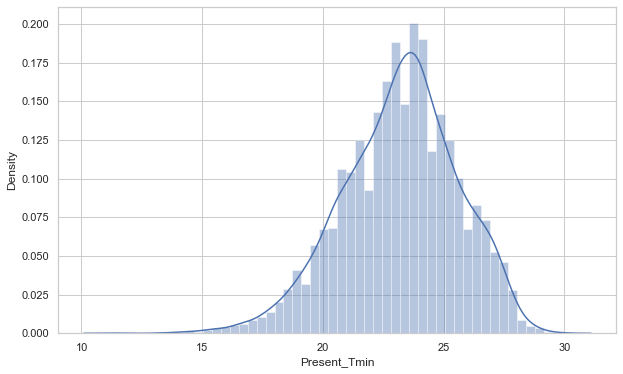

In [1503]:
#Present_Tmin
histogram(df,"Present_Tmin")

In [1504]:
#the data is left skwed.

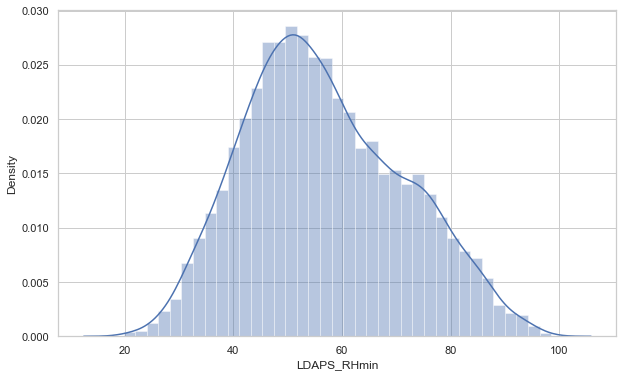

In [1505]:
#LDAPS_RHmin
histogram(df,"LDAPS_RHmin")

In [1506]:
#the data is right skwed. and has maximum value if 100

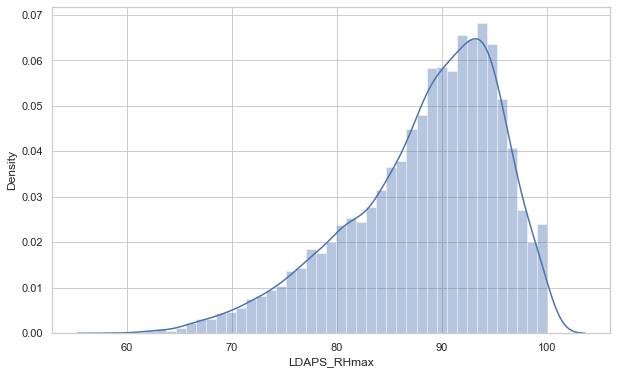

In [1507]:
#LDAPS_RHmax
histogram(df,"LDAPS_RHmax")

In [1508]:
#teh data is left skwed with value ranges from 60 to 100

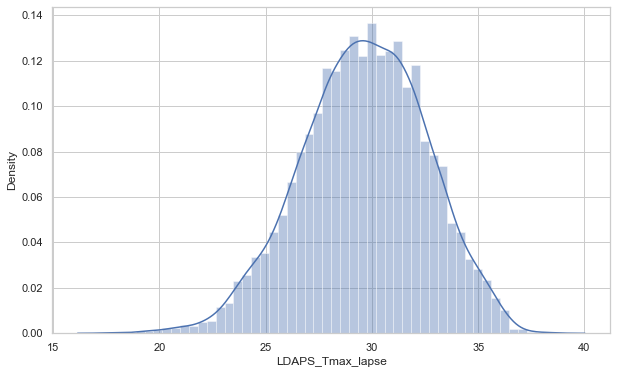

In [1509]:
#LDAPS_Tmax_lapse
histogram(df,"LDAPS_Tmax_lapse")

In [1510]:
#the data is normally distributed

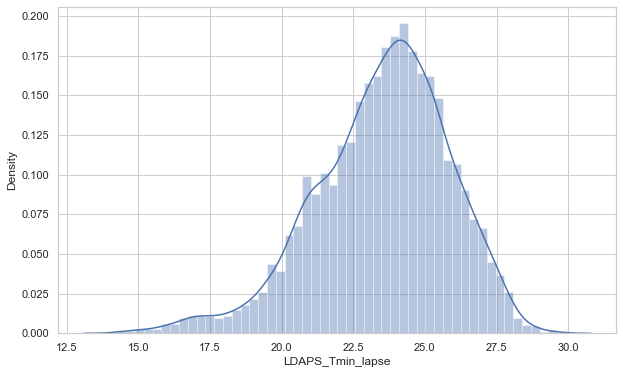

In [1511]:
#LDAPS_Tmin_lapse
histogram(df,"LDAPS_Tmin_lapse")

In [1512]:
#the data is also normally distributed.

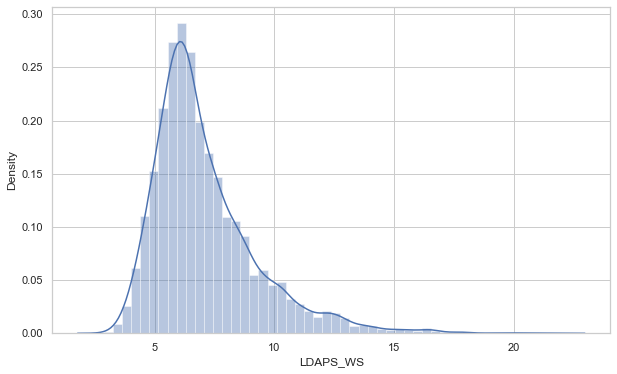

In [1513]:
#LDAPS_WS
histogram(df,"LDAPS_WS")

In [1514]:
#the data is right skwed.

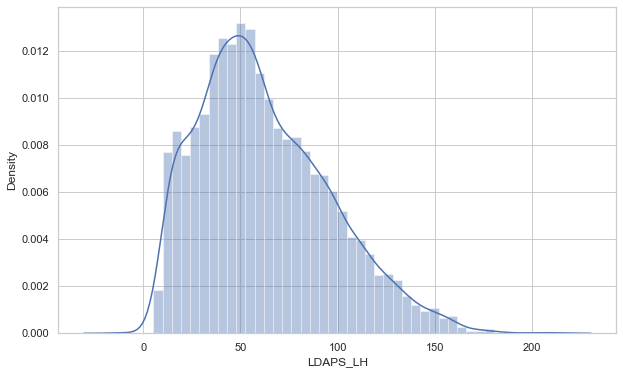

In [1515]:
#LDAPS_LH
histogram(df,"LDAPS_LH")

In [1516]:
#the data is right skwed

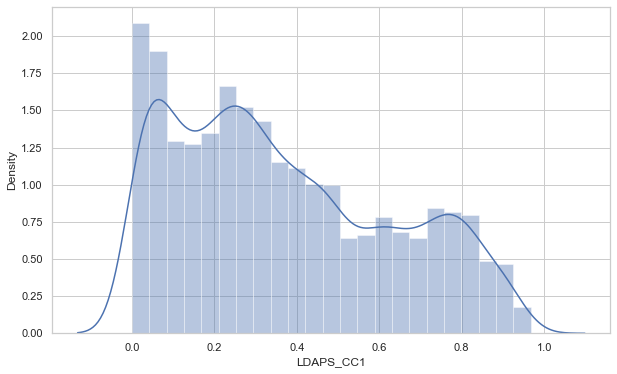

In [1517]:
#LDAPS_CC1
histogram(df,"LDAPS_CC1")

In [1518]:
#the data is right skwed

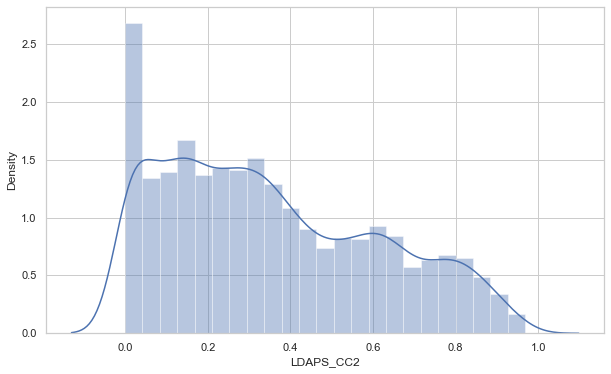

In [1519]:
#LDAPS_CC2
histogram(df,"LDAPS_CC2")

In [1520]:
#the data is right skwed

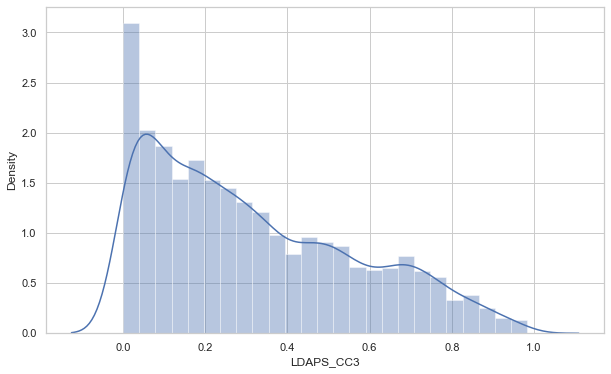

In [1521]:
#LDAPS_CC3
histogram(df,"LDAPS_CC3")

In [1522]:
#the data is right skwed

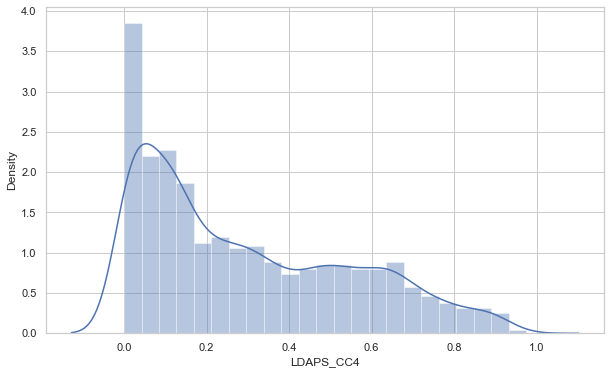

In [1523]:
#LDAPS_CC4
histogram(df,"LDAPS_CC4")

In [1524]:
#the data is right skwed

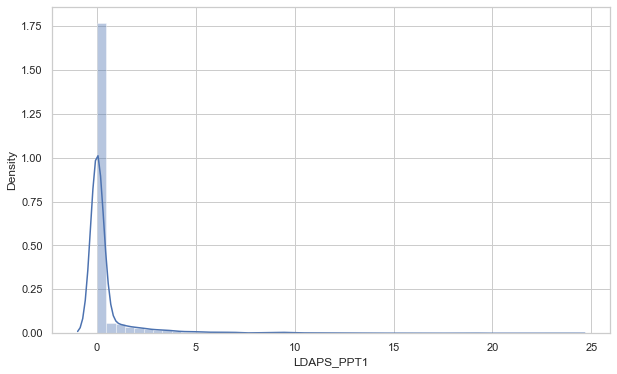

In [1525]:
#LDAPS_PPT1
histogram(df,"LDAPS_PPT1")

In [1526]:
#the data is right skwed
#also the data is huge outliers
#most of the value of this variable is 0

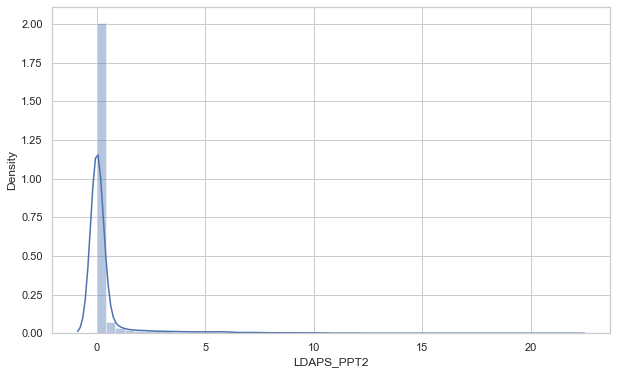

In [1527]:
#LDAPS_PPT2
histogram(df,"LDAPS_PPT2")

In [1528]:
#the data is right skwed
#also the data is huge outliers
#most of the value of this variable is 0

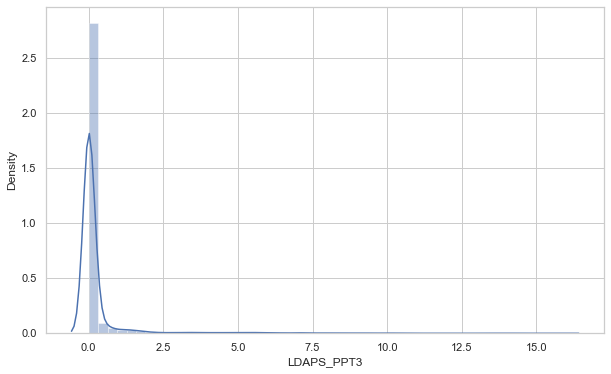

In [1529]:
#LDAPS_PPT3
histogram(df,"LDAPS_PPT3")

In [1530]:
#the data is right skwed
#also the data is huge outliers
#most of the value of this variable is 0

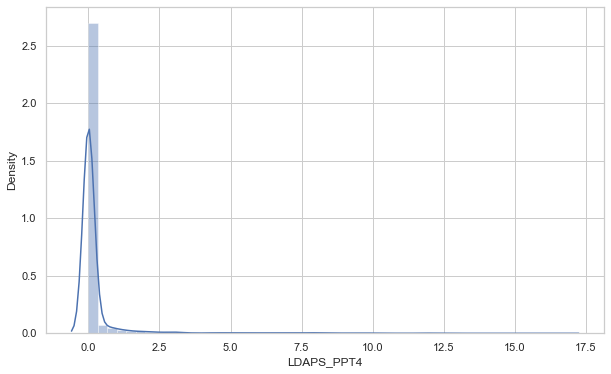

In [1531]:
#LDAPS_PPT4
histogram(df,"LDAPS_PPT4")

In [1532]:
#the data is right skwed
#also the data is huge outliers
#most of the value of this variable is 0

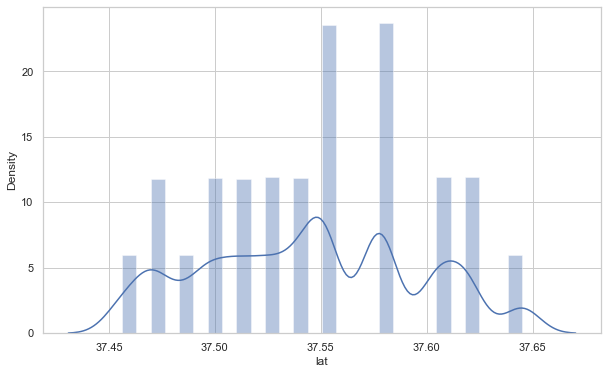

In [1533]:
#lat
histogram(df,"lat")

In [1534]:
#37.55,37.60 has the highest frequenct shile 37.45 and 37.65 has least

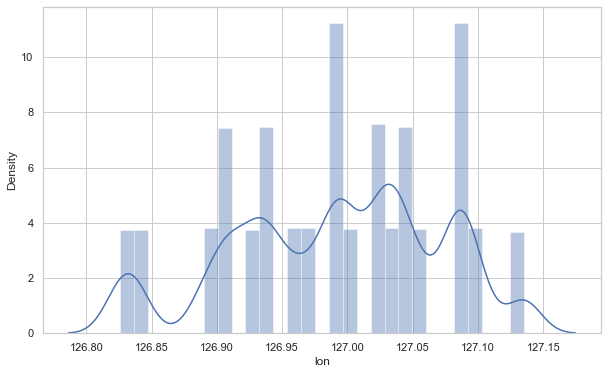

In [1535]:
#lon
histogram(df,"lon")

In [1536]:
# 2 of the values has most frequency 

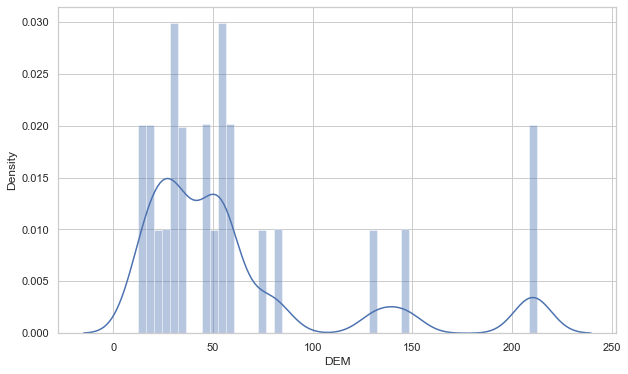

In [1537]:
#DEM
histogram(df,"DEM")

In [1538]:
#most of the values lies between 0 to 50, howver the variable has soem outliers


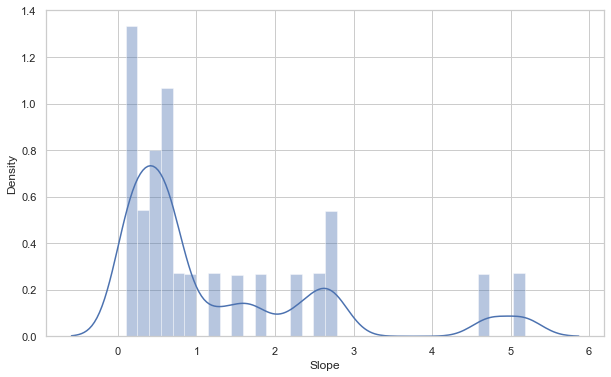

In [1539]:
#Slope
histogram(df,"Slope")

In [1540]:
#most of the frequency lies between 0 to ,
#the dataset is highly skwed 
#the variable has huge outliers


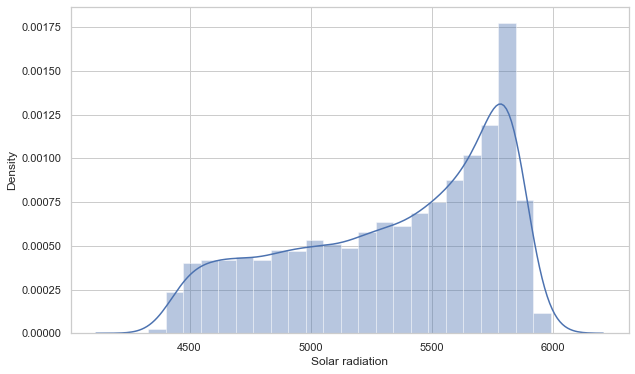

In [1541]:
#Solar radiation
histogram(df,"Solar radiation")

In [1542]:
#the range of the data is 4500 to 6000
#the data is left skwed

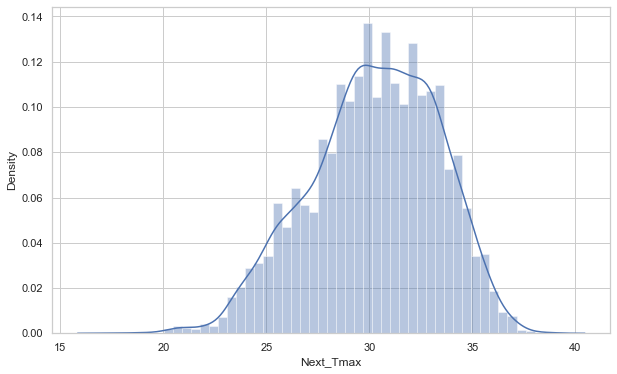

In [1543]:
#Next_Tmax
histogram(df,"Next_Tmax")

In [1544]:
#there is some skweness in the variable

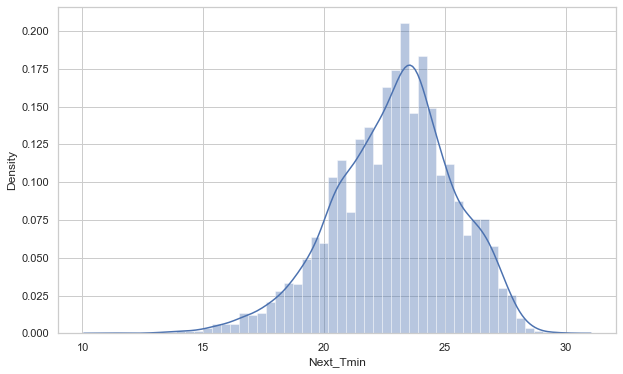

In [1545]:
#Next_Tmin
histogram(df,"Next_Tmin")

In [1546]:
#there is some skweness in the variable

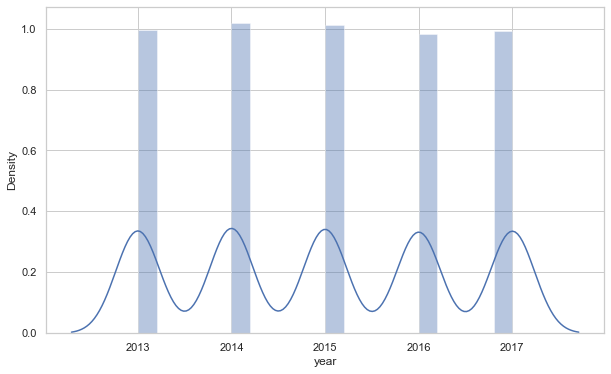

In [1547]:
#year
histogram(df,"year")

In [1548]:
#the data is from year 2013 to 2017 

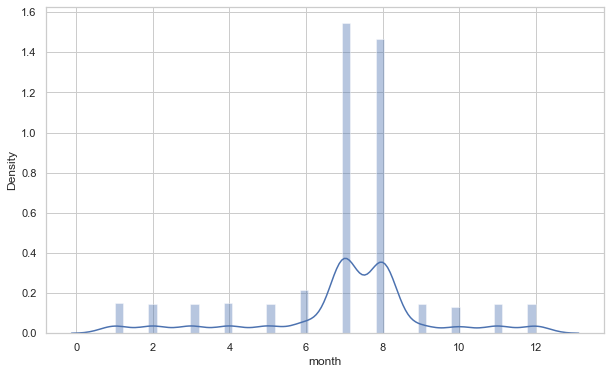

In [1549]:
#month
histogram(df,"month")

In [1550]:
#7th, 8th month data contains highest frequency

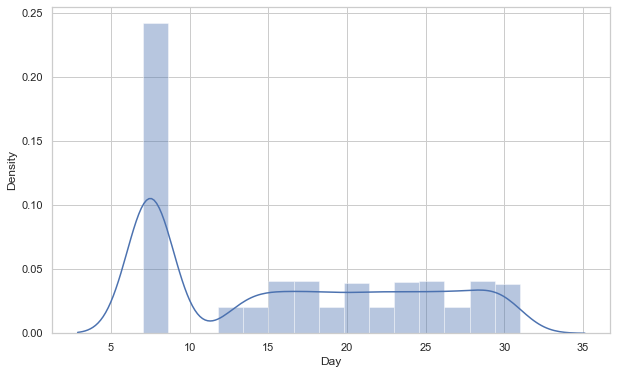

In [1551]:
#Day
histogram(df,"Day")

In [1552]:
#the data in the first week of the moth has highest frequency

In [1553]:
#crating list for bivariate analysis
feature=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'year', 'month', 'Day']

In [1554]:
list(enumerate(feature))

[(0, 'station'),
 (1, 'Present_Tmax'),
 (2, 'Present_Tmin'),
 (3, 'LDAPS_RHmin'),
 (4, 'LDAPS_RHmax'),
 (5, 'LDAPS_Tmax_lapse'),
 (6, 'LDAPS_Tmin_lapse'),
 (7, 'LDAPS_WS'),
 (8, 'LDAPS_LH'),
 (9, 'LDAPS_CC1'),
 (10, 'LDAPS_CC2'),
 (11, 'LDAPS_CC3'),
 (12, 'LDAPS_CC4'),
 (13, 'LDAPS_PPT1'),
 (14, 'LDAPS_PPT2'),
 (15, 'LDAPS_PPT3'),
 (16, 'LDAPS_PPT4'),
 (17, 'lat'),
 (18, 'lon'),
 (19, 'DEM'),
 (20, 'Slope'),
 (21, 'Solar radiation'),
 (22, 'year'),
 (23, 'month'),
 (24, 'Day')]

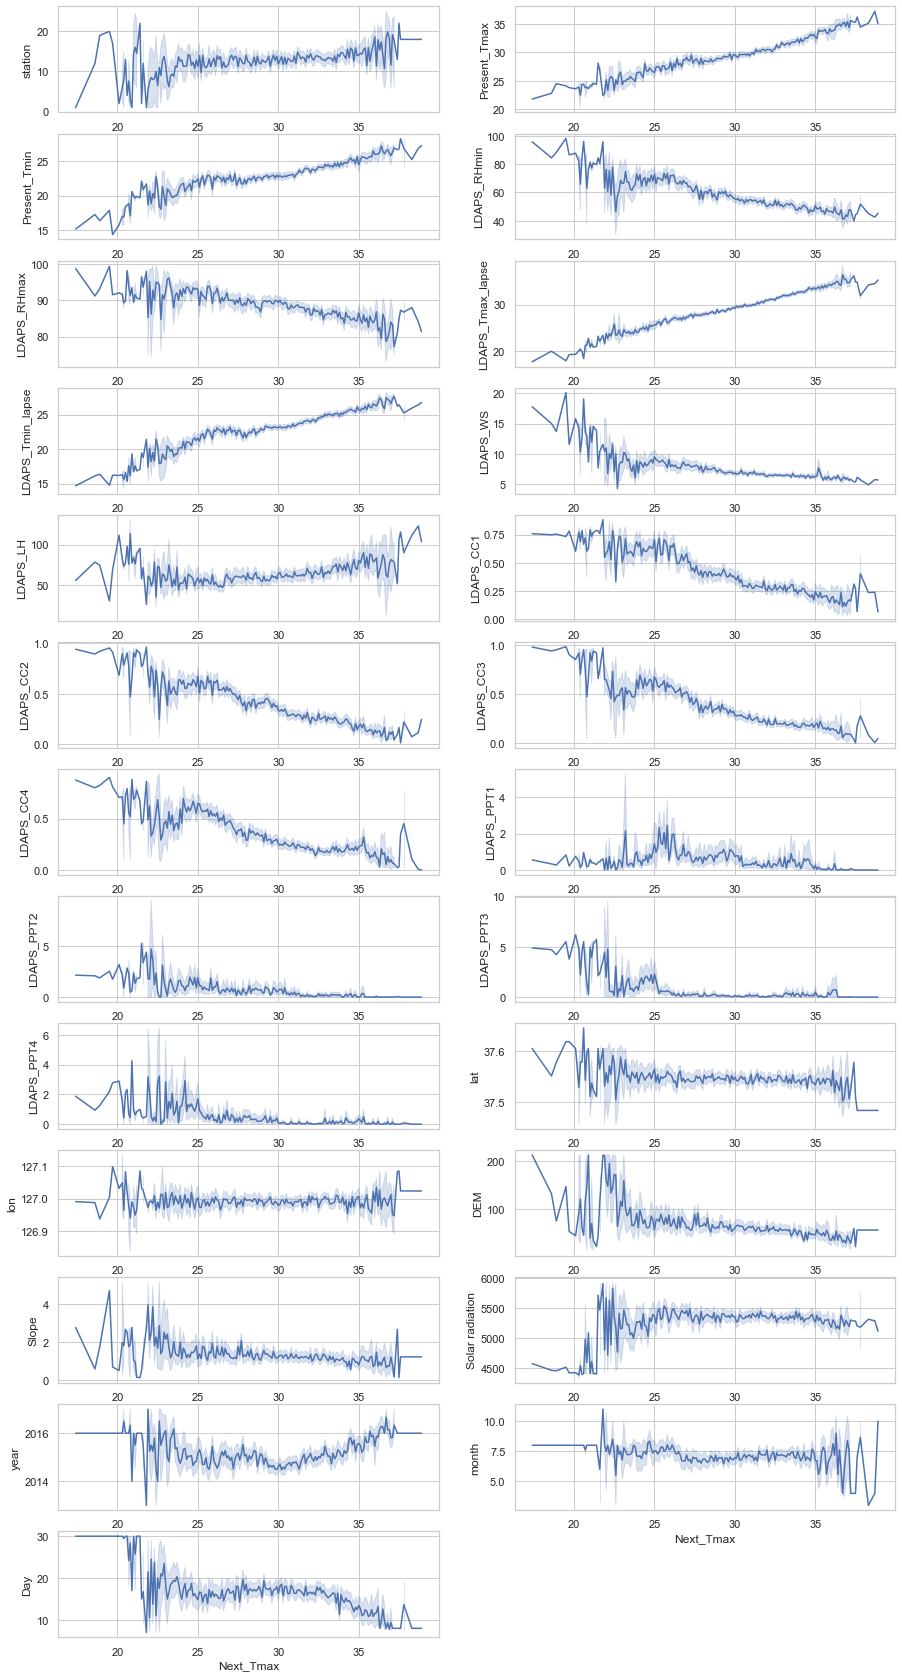

In [1555]:
#bivariate analysis "Next_Tmax"
plt.figure(figsize=(15,30))
for i in enumerate(feature):
    plt.subplot(13,2,i[0]+1)
    sns.lineplot(x="Next_Tmax",y=i[1],data=df)
    

In [ ]:
#station is showing slightly linearrelation with Next_Tmax
#Present_Tmax is showing strong linear relationship with Next_Tmax
#Present_Tmin is showing strong linear relationship with Next_Tmax
#LDAPS_RHmin is showing strong negative linear relationship with Next_Tmax
#LDAPS_Tmax_lapse is showing strong linear relationship with Next_Tmax
#LDAPS_Tmin_lapse is showing strong linear relationship with Next_Tmax
#LDAPS_WS is showing strong negative linear relationship with Next_Tmax
#LDAPS_CC1 is showing strong negative linear relationship with Next_Tmax
#LDAPS_CC2 is showing strong negative linear relationship with Next_Tmax
#LDAPS_CC3 is showing strong negative linear relationship with Next_Tmax
#LDAPS_CC4 is showing strong negative linear relationship with Next_Tmax
#There is chance of multicolinearity


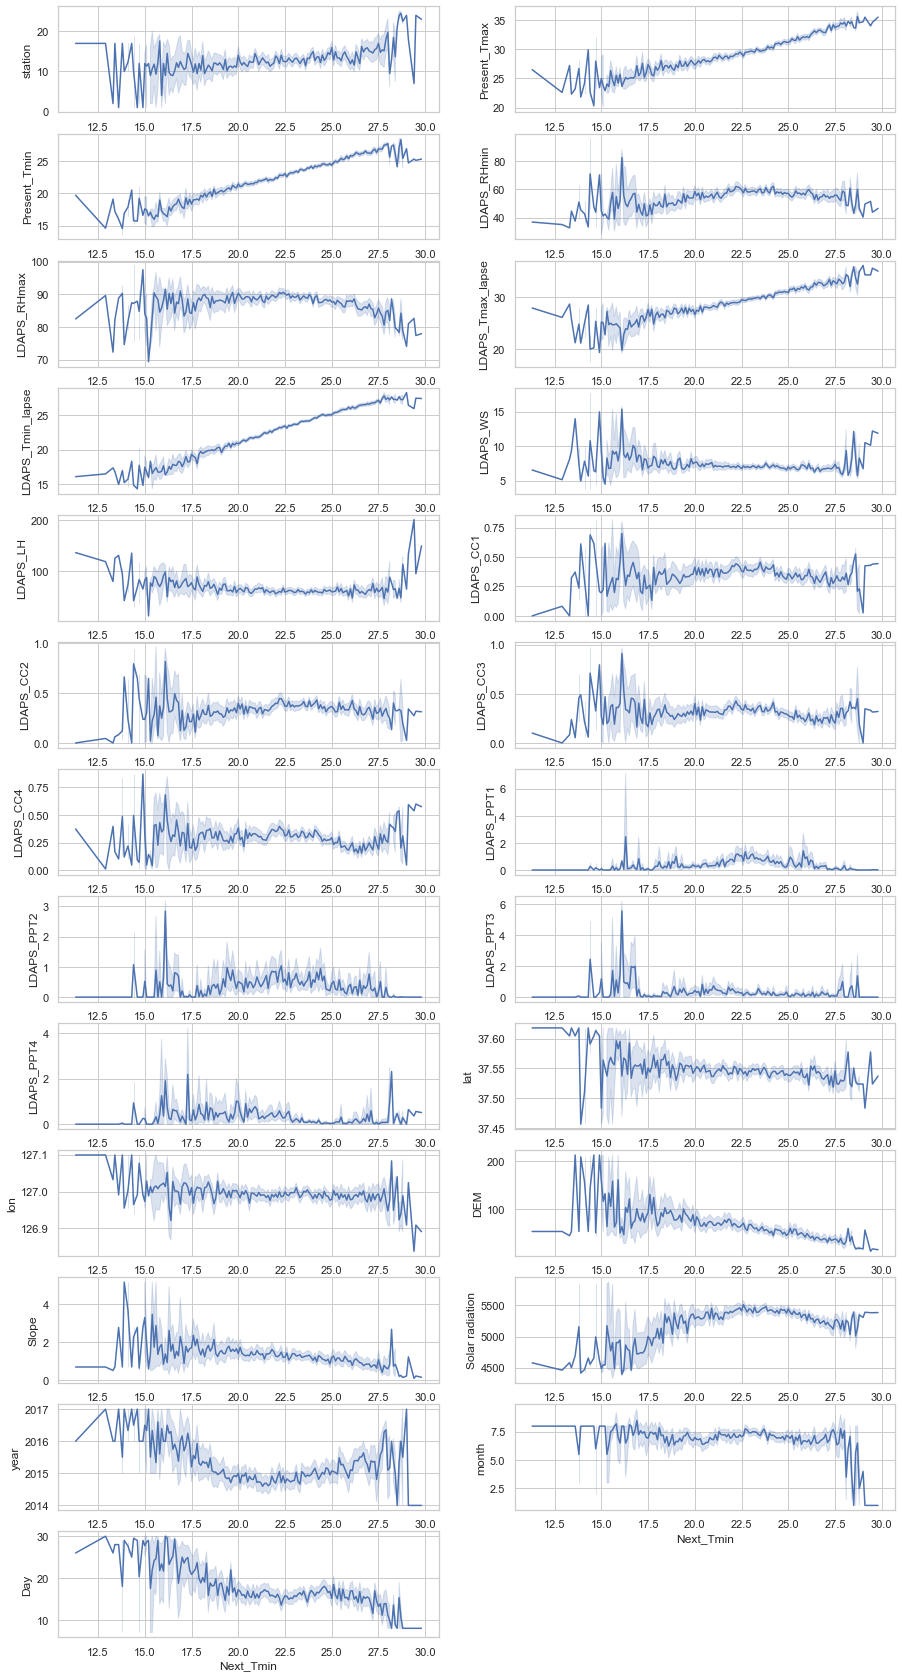

In [1556]:
#bivariate analysis Next_Tmin
plt.figure(figsize=(15,30))
for i in enumerate(feature):
    plt.subplot(13,2,i[0]+1)
    sns.lineplot(x="Next_Tmin",y=i[1],data=df)

In [ ]:
#station is showing slightly linearrelation with Next_Tmin
#Present_Tmax is showing strong linear relationship with Next_Tmin
#Present_Tmin is showing strong linear relationship with Next_Tmin
#LDAPS_RHmax is showing strong negative linear relationship with Next_Tmin
#LDAPS_Tmax_lapse is showing strong linear relationship with Next_Tmin
#LDAPS_Tmin_lapse is showing strong linear relationship with Next_Tmin
#all other variable is showing loose linear relationship with Next_Tmin
#there may be case of multicolinearity

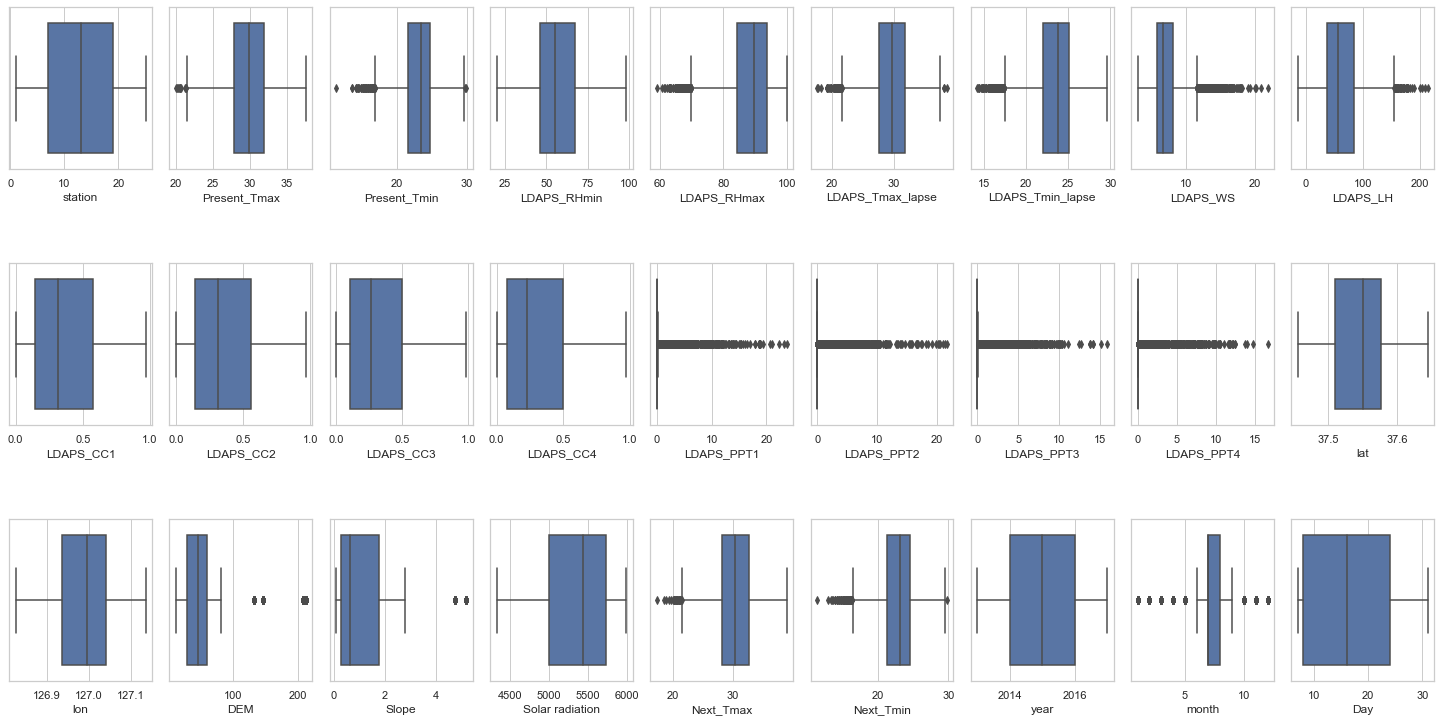

In [1557]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=9,nrows=3, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [ ]:
#There are outliers in nearly all the columns

In [1558]:
#using zscore to treat outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]


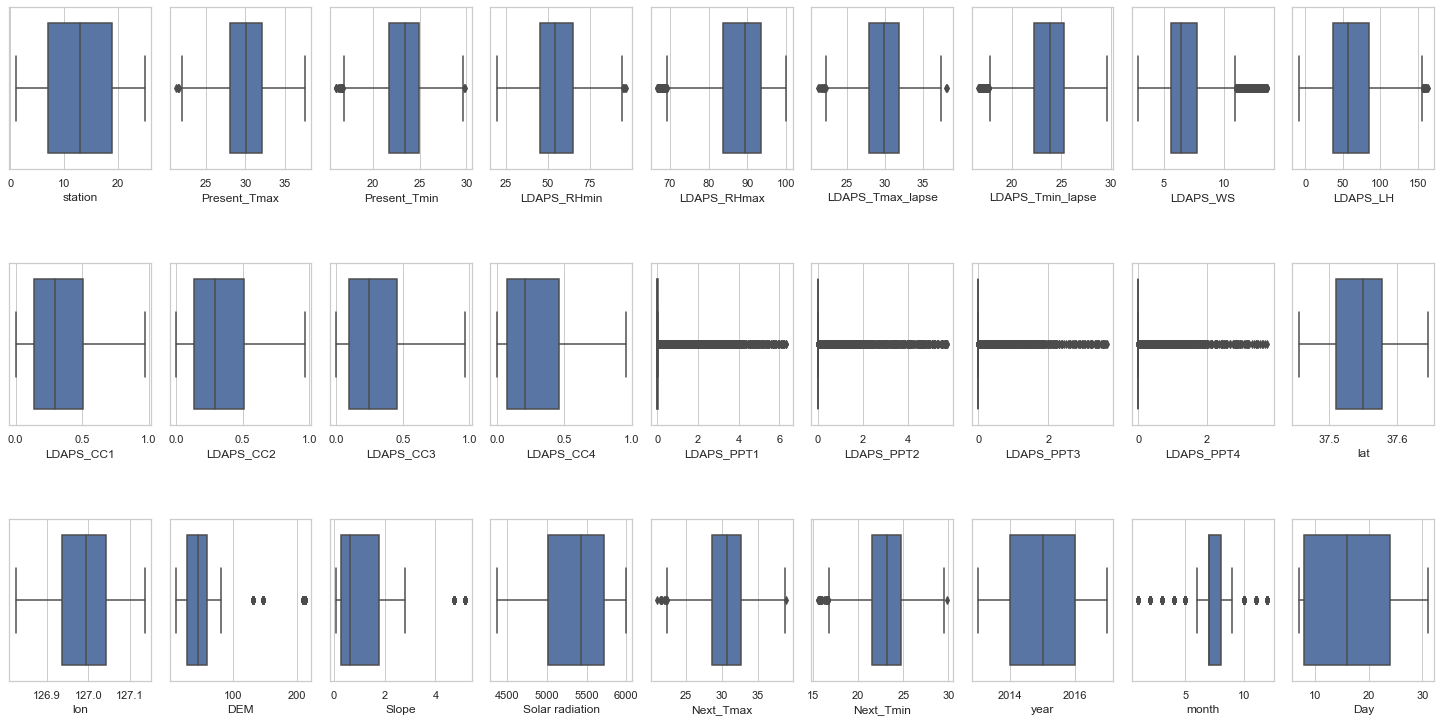

In [1559]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=9,nrows=3, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df_new.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [ ]:
#Even after using all outlier removal technique(zscore,IQR) there is still huge outliers in few columns

In [1560]:
#replacing values above 95 percentile with nan then replacing nan with moder to remove ouliers
df_new["LDAPS_PPT1"]=df_new[df_new.LDAPS_PPT1 < np.percentile(df_new.LDAPS_PPT1,95)]
df_new['LDAPS_PPT1'].fillna(df_new['LDAPS_PPT1'].mode()[0], inplace=True)
df_new["LDAPS_PPT2"]=df_new[df_new.LDAPS_PPT2 < np.percentile(df_new.LDAPS_PPT2,95)]
df_new['LDAPS_PPT2'].fillna(df_new['LDAPS_PPT2'].mode()[0], inplace=True)
df_new["LDAPS_PPT3"]=df_new[df_new.LDAPS_PPT3 < np.percentile(df_new.LDAPS_PPT3,95)]
df_new['LDAPS_PPT3'].fillna(df_new['LDAPS_PPT3'].mode()[0], inplace=True)
df_new["LDAPS_PPT4"]=df_new[df_new.LDAPS_PPT4 < np.percentile(df_new.LDAPS_PPT4,95)]
df_new['LDAPS_PPT4'].fillna(df_new['LDAPS_PPT4'].mode()[0], inplace=True)

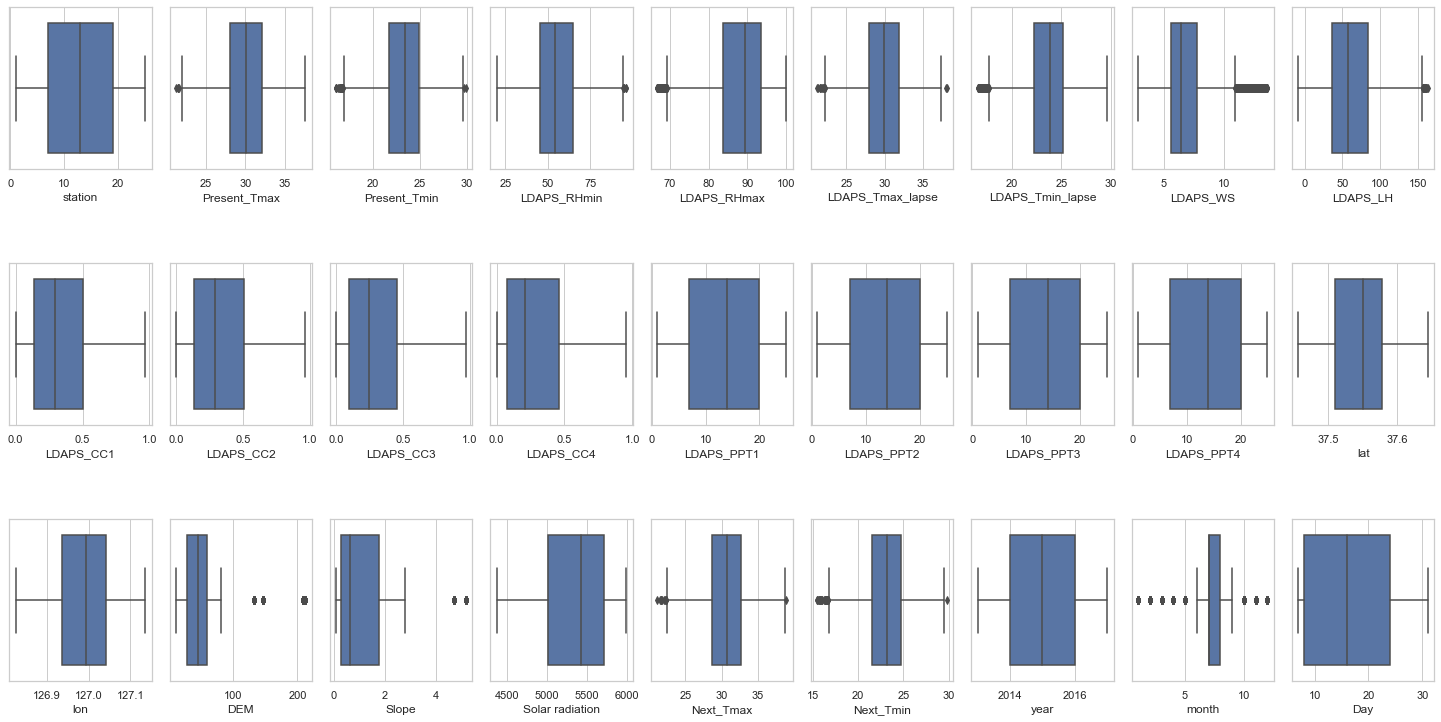

In [1561]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=9,nrows=3, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df_new.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [ ]:
#most outliers has been treated

In [1563]:
#checking correlation
cor=df.corr()

<AxesSubplot:>

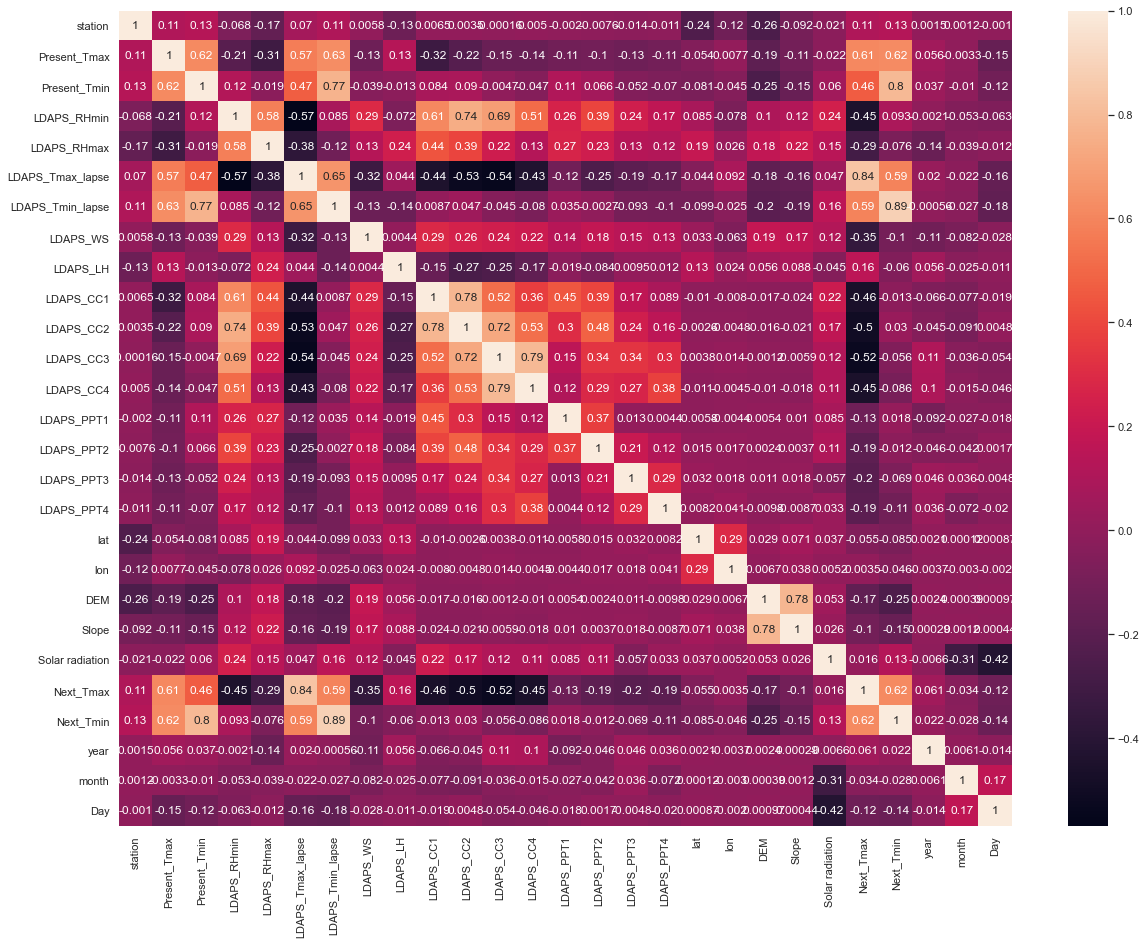

In [1564]:
#sns heatmap
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True)

In [1565]:
#correlation of Next_Tmax
cor["Next_Tmax"].sort_values(ascending = False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.835729
Next_Tmin           0.616629
Present_Tmax        0.610357
LDAPS_Tmin_lapse    0.592119
Present_Tmin        0.463523
LDAPS_LH            0.156779
station             0.107747
year                0.061211
Solar radiation     0.016145
lon                 0.003502
month              -0.033684
lat                -0.055367
Slope              -0.104279
Day                -0.122303
LDAPS_PPT1         -0.125954
DEM                -0.174578
LDAPS_PPT2         -0.186722
LDAPS_PPT4         -0.190720
LDAPS_PPT3         -0.203554
LDAPS_RHmax        -0.289788
LDAPS_WS           -0.351107
LDAPS_RHmin        -0.446824
LDAPS_CC4          -0.454039
LDAPS_CC1          -0.459705
LDAPS_CC2          -0.498295
LDAPS_CC3          -0.523061
Name: Next_Tmax, dtype: float64

In [1566]:
#creating data frame f1 for the first model("Next_Tmax")
#droping veriable closer to zero in correlation with Next_Tmax
f1=df_new.drop(["year","lon","Solar radiation","month","lat"],axis=1)

In [1567]:
#correlation of Next_Tmin
cor["Next_Tmin"].sort_values(ascending = False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.886513
Present_Tmin        0.796975
Present_Tmax        0.621048
Next_Tmax           0.616629
LDAPS_Tmax_lapse    0.589963
station             0.128184
Solar radiation     0.125517
LDAPS_RHmin         0.093249
LDAPS_CC2           0.030358
year                0.021617
LDAPS_PPT1          0.018031
LDAPS_PPT2         -0.012462
LDAPS_CC1          -0.012877
month              -0.028344
lon                -0.045758
LDAPS_CC3          -0.056490
LDAPS_LH           -0.060392
LDAPS_PPT3         -0.068664
LDAPS_RHmax        -0.076415
lat                -0.085136
LDAPS_CC4          -0.086197
LDAPS_WS           -0.102021
LDAPS_PPT4         -0.114900
Day                -0.135865
Slope              -0.148379
DEM                -0.249303
Name: Next_Tmin, dtype: float64

In [1568]:
#creating data frame f2 for the second model("Next_Tmin")
#droping veriable closer to zero in correlation with Next_Tmin
f2=df_new.drop(["LDAPS_CC2","year","LDAPS_PPT1","LDAPS_PPT2","LDAPS_CC1","month","lon"],axis=1)


In [1569]:
#(Next_Tmax)
x=f1.drop(["Next_Tmax",'Next_Tmin'],axis=1)

In [1570]:
#Next_Tmin
n=f2.drop(["Next_Tmax",'Next_Tmin'],axis=1)

In [1571]:
#using VIF for multicolinearity check for next_Tmax
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,24.016995,station
1,2.719619,Present_Tmax
2,3.027773,Present_Tmin
3,5.510154,LDAPS_RHmin
4,2.175260,LDAPS_RHmax
5,6.307743,LDAPS_Tmax_lapse
6,6.690809,LDAPS_Tmin_lapse
7,1.178853,LDAPS_WS
8,1.523596,LDAPS_LH
9,3.045782,LDAPS_CC1


In [1572]:
#creating data freame from scaled data
x=pd.DataFrame(x_scaled, columns=x.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Day
0,-1.672719,-0.425704,-0.814460,0.195915,0.437537,-0.662498,-0.289928,-0.020735,0.225115,-0.440130,-0.526550,-0.568017,-0.614602,-1.710315,-1.711714,-1.705808,-1.704956,2.828736,1.143153,1.674045
1,-1.533959,0.690215,-0.727785,-0.236604,0.364239,-0.016693,0.171379,-0.631488,-0.298746,-0.473686,-0.327568,-0.577779,-0.628231,-1.574174,-1.575615,-1.569888,-1.568922,-0.304406,-0.536509,1.674045
2,-1.395198,0.585598,0.008945,-0.494494,-0.585732,0.070769,0.409475,-0.389607,-1.236867,-0.537958,-0.303886,-0.384307,-0.566924,-1.438033,-1.439516,-1.433968,-1.432888,-0.518594,-0.719941,1.674045
3,-1.256438,0.725088,0.052282,0.194767,1.206456,-0.069787,-0.146681,-0.654162,0.113709,-0.510012,-0.434669,-0.570355,-0.600463,-1.301893,-1.303416,-1.298047,-1.296854,-0.286576,0.958094,1.674045
4,-1.117678,0.515853,-0.597774,0.045667,0.299831,-0.284509,-0.074752,-0.608123,1.377075,-0.768323,-0.334950,-0.493503,-0.448143,-1.165752,-1.167317,-1.162127,-1.160820,-0.486225,-0.542870,1.674045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,1.102482,-2.378563,-2.374595,-2.226900,-1.404059,-0.757521,-2.400625,-0.137593,-1.564654,-1.159992,-1.248595,-1.268705,-1.153447,1.012500,1.010274,1.012593,1.015723,-0.649639,-0.493610,1.674045
6735,1.241243,-2.587798,-2.547943,-1.836710,-0.626356,-1.160213,-2.620034,-0.590197,0.604824,-1.106080,-1.272079,-1.268702,-1.096825,1.148641,1.146374,1.148513,1.151757,-0.730620,-0.818240,1.674045
6736,1.380003,-2.308818,-2.677955,-2.078766,-1.316889,-1.288468,-2.188536,-0.383811,0.303076,-1.250919,-1.037185,-1.268705,-1.172097,1.284781,1.282473,1.284433,1.287791,-0.849894,-0.801820,1.674045
6737,1.518763,-2.308818,-2.417932,-2.273699,-1.542506,-1.049238,-2.207453,-0.170344,-0.439205,-1.227700,-1.062424,-1.268705,-1.172097,1.420922,1.418573,1.420353,1.423825,-0.817959,-0.752338,1.674045


In [1573]:
#removing mulitcolinear columns
x.drop(["station","LDAPS_RHmin","LDAPS_Tmin_lapse","LDAPS_PPT4","LDAPS_PPT2"],axis=1,inplace=True)

In [1574]:
#using VIF for multicolinearity check for next_Tmax
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,2.471085,Present_Tmax
1,2.236170,Present_Tmin
2,1.782879,LDAPS_RHmax
3,2.747375,LDAPS_Tmax_lapse
4,1.159931,LDAPS_WS
5,1.425620,LDAPS_LH
6,2.939376,LDAPS_CC1
7,4.051846,LDAPS_CC2
8,4.283345,LDAPS_CC3
9,2.586758,LDAPS_CC4


In [1575]:
#creating data freame from scaled data
x=pd.DataFrame(x_scaled, columns=x.columns)
x

,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT3,DEM,Slope,Day
0,-0.425704,-0.814460,0.437537,-0.662498,-0.020735,0.225115,-0.440130,-0.526550,-0.568017,-0.614602,-1.710315,-1.705808,2.828736,1.143153,1.674045
1,0.690215,-0.727785,0.364239,-0.016693,-0.631488,-0.298746,-0.473686,-0.327568,-0.577779,-0.628231,-1.574174,-1.569888,-0.304406,-0.536509,1.674045
2,0.585598,0.008945,-0.585732,0.070769,-0.389607,-1.236867,-0.537958,-0.303886,-0.384307,-0.566924,-1.438033,-1.433968,-0.518594,-0.719941,1.674045
3,0.725088,0.052282,1.206456,-0.069787,-0.654162,0.113709,-0.510012,-0.434669,-0.570355,-0.600463,-1.301893,-1.298047,-0.286576,0.958094,1.674045
4,0.515853,-0.597774,0.299831,-0.284509,-0.608123,1.377075,-0.768323,-0.334950,-0.493503,-0.448143,-1.165752,-1.162127,-0.486225,-0.542870,1.674045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,-2.378563,-2.374595,-1.404059,-0.757521,-0.137593,-1.564654,-1.159992,-1.248595,-1.268705,-1.153447,1.012500,1.012593,-0.649639,-0.493610,1.674045
6735,-2.587798,-2.547943,-0.626356,-1.160213,-0.590197,0.604824,-1.106080,-1.272079,-1.268702,-1.096825,1.148641,1.148513,-0.730620,-0.818240,1.674045
6736,-2.308818,-2.677955,-1.316889,-1.288468,-0.383811,0.303076,-1.250919,-1.037185,-1.268705,-1.172097,1.284781,1.284433,-0.849894,-0.801820,1.674045
6737,-2.308818,-2.417932,-1.542506,-1.049238,-0.170344,-0.439205,-1.227700,-1.062424,-1.268705,-1.172097,1.420922,1.420353,-0.817959,-0.752338,1.674045


In [1576]:
#using VIF for multicolinearity check Next_Tmin
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scalar=StandardScaler()
n_scaled=scalar.fit_transform(n)
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(n_scaled, i) for i in range(n_scaled.shape[1])]
vif["features"]=n.columns
vif

,vif,features
0,13.679406,station
1,2.437820,Present_Tmax
2,2.980575,Present_Tmin
3,5.668930,LDAPS_RHmin
4,2.071837,LDAPS_RHmax
5,6.312722,LDAPS_Tmax_lapse
6,6.449584,LDAPS_Tmin_lapse
7,1.166627,LDAPS_WS
8,1.452754,LDAPS_LH
9,4.093110,LDAPS_CC3


In [1577]:
#creating data freame from scaled data
n=pd.DataFrame(n_scaled, columns=n.columns)
x

,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT3,DEM,Slope,Day
0,-0.425704,-0.814460,0.437537,-0.662498,-0.020735,0.225115,-0.440130,-0.526550,-0.568017,-0.614602,-1.710315,-1.705808,2.828736,1.143153,1.674045
1,0.690215,-0.727785,0.364239,-0.016693,-0.631488,-0.298746,-0.473686,-0.327568,-0.577779,-0.628231,-1.574174,-1.569888,-0.304406,-0.536509,1.674045
2,0.585598,0.008945,-0.585732,0.070769,-0.389607,-1.236867,-0.537958,-0.303886,-0.384307,-0.566924,-1.438033,-1.433968,-0.518594,-0.719941,1.674045
3,0.725088,0.052282,1.206456,-0.069787,-0.654162,0.113709,-0.510012,-0.434669,-0.570355,-0.600463,-1.301893,-1.298047,-0.286576,0.958094,1.674045
4,0.515853,-0.597774,0.299831,-0.284509,-0.608123,1.377075,-0.768323,-0.334950,-0.493503,-0.448143,-1.165752,-1.162127,-0.486225,-0.542870,1.674045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,-2.378563,-2.374595,-1.404059,-0.757521,-0.137593,-1.564654,-1.159992,-1.248595,-1.268705,-1.153447,1.012500,1.012593,-0.649639,-0.493610,1.674045
6735,-2.587798,-2.547943,-0.626356,-1.160213,-0.590197,0.604824,-1.106080,-1.272079,-1.268702,-1.096825,1.148641,1.148513,-0.730620,-0.818240,1.674045
6736,-2.308818,-2.677955,-1.316889,-1.288468,-0.383811,0.303076,-1.250919,-1.037185,-1.268705,-1.172097,1.284781,1.284433,-0.849894,-0.801820,1.674045
6737,-2.308818,-2.417932,-1.542506,-1.049238,-0.170344,-0.439205,-1.227700,-1.062424,-1.268705,-1.172097,1.420922,1.420353,-0.817959,-0.752338,1.674045


In [1578]:
#Removing multicolinear columns
n.drop(["LDAPS_Tmin_lapse","LDAPS_RHmin","LDAPS_PPT4","station"],axis=1,inplace=True)

In [1579]:
#using VIF for multicolinearity check Next_Tmin
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
scalar=StandardScaler()
n_scaled=scalar.fit_transform(n)
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(n_scaled, i) for i in range(n_scaled.shape[1])]
vif["features"]=n.columns
vif

,vif,features
0,2.265208,Present_Tmax
1,2.052129,Present_Tmin
2,1.660628,LDAPS_RHmax
3,2.673664,LDAPS_Tmax_lapse
4,1.146170,LDAPS_WS
5,1.328779,LDAPS_LH
6,3.425428,LDAPS_CC3
7,2.562806,LDAPS_CC4
8,1.202993,LDAPS_PPT3
9,1.112670,lat


In [1580]:
#creating data freame from scaled data
n=pd.DataFrame(n_scaled, columns=n.columns)
x

,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT3,DEM,Slope,Day
0,-0.425704,-0.814460,0.437537,-0.662498,-0.020735,0.225115,-0.440130,-0.526550,-0.568017,-0.614602,-1.710315,-1.705808,2.828736,1.143153,1.674045
1,0.690215,-0.727785,0.364239,-0.016693,-0.631488,-0.298746,-0.473686,-0.327568,-0.577779,-0.628231,-1.574174,-1.569888,-0.304406,-0.536509,1.674045
2,0.585598,0.008945,-0.585732,0.070769,-0.389607,-1.236867,-0.537958,-0.303886,-0.384307,-0.566924,-1.438033,-1.433968,-0.518594,-0.719941,1.674045
3,0.725088,0.052282,1.206456,-0.069787,-0.654162,0.113709,-0.510012,-0.434669,-0.570355,-0.600463,-1.301893,-1.298047,-0.286576,0.958094,1.674045
4,0.515853,-0.597774,0.299831,-0.284509,-0.608123,1.377075,-0.768323,-0.334950,-0.493503,-0.448143,-1.165752,-1.162127,-0.486225,-0.542870,1.674045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,-2.378563,-2.374595,-1.404059,-0.757521,-0.137593,-1.564654,-1.159992,-1.248595,-1.268705,-1.153447,1.012500,1.012593,-0.649639,-0.493610,1.674045
6735,-2.587798,-2.547943,-0.626356,-1.160213,-0.590197,0.604824,-1.106080,-1.272079,-1.268702,-1.096825,1.148641,1.148513,-0.730620,-0.818240,1.674045
6736,-2.308818,-2.677955,-1.316889,-1.288468,-0.383811,0.303076,-1.250919,-1.037185,-1.268705,-1.172097,1.284781,1.284433,-0.849894,-0.801820,1.674045
6737,-2.308818,-2.417932,-1.542506,-1.049238,-0.170344,-0.439205,-1.227700,-1.062424,-1.268705,-1.172097,1.420922,1.420353,-0.817959,-0.752338,1.674045


In [1581]:
#checking skewness for next_Tmax
x.skew()

Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1         -0.081607
LDAPS_PPT3         -0.081190
DEM                 1.764698
Slope               1.590130
Day                 0.256528
dtype: float64

In [1582]:
#checking skewness for next_Tmin
n.skew()

Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT3         -0.081190
lat                 0.106983
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Day                 0.256528
dtype: float64

In [1583]:
# treating skewness with power transform for x
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
#checking for skewness
x=df_new
x.skew()

Present_Tmax       -0.010021
Present_Tmin       -0.003623
LDAPS_RHmax        -0.047654
LDAPS_Tmax_lapse   -0.005450
LDAPS_WS            0.001413
LDAPS_LH            0.055395
LDAPS_CC1           0.089213
LDAPS_CC2           0.080899
LDAPS_CC3           0.119516
LDAPS_CC4           0.166287
LDAPS_PPT1         -0.022445
LDAPS_PPT3         -0.022397
DEM                 0.219194
Slope               0.381581
Day                 0.104580
dtype: float64

In [1584]:
# treating skewness with power transform for n
from sklearn.preprocessing import power_transform
df_new=power_transform(n)
df_new=pd.DataFrame(df_new,columns=n.columns)
n=df_new
#checking for skewness
n.skew()

Present_Tmax       -0.010021
Present_Tmin       -0.003623
LDAPS_RHmax        -0.047654
LDAPS_Tmax_lapse   -0.005450
LDAPS_WS            0.001413
LDAPS_LH            0.055395
LDAPS_CC3           0.119516
LDAPS_CC4           0.166287
LDAPS_PPT3         -0.022397
lat                 0.017842
DEM                 0.219194
Slope               0.381581
Solar radiation    -0.117921
Day                 0.104580
dtype: float64

# model_buidding for Next_Tmax

In [1586]:
#dependent variable(Next_Tmax)
y=f1["Next_Tmax"]

In [1587]:
#importing libraries


In [1588]:
#spliting train test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4717, 15), (4717,), (2022, 15), (2022,))

In [1589]:
#creating function 
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""mean squared error is:
    """,mean_squared_error(y_test, predict))
       
    print("The mean absolute error is: ", mean_absolute_error(y_test,predict))
    
    
    print("r2 score is: ",r2_score(y_test,predict))
    
    print("cross_val_score", cross_val_score(model,x,y,cv=5).mean())

In [1590]:
#LineraRegression
model(LinearRegression)

mean squared error is:
     2.192286295831529
The mean absolute error is:  1.1277783992133033
r2 score is:  0.7351567408669786
cross_val_score 0.6891925485396865


In [1591]:
#decisiontreeregressor
model(DecisionTreeRegressor)

mean squared error is:
     2.2148565776458953
The mean absolute error is:  1.0567754698318494
r2 score is:  0.7324300956260565
cross_val_score 0.40533344822207446


In [1592]:
#randomforestregressor
model(RandomForestRegressor)

mean squared error is:
     1.0357747903066268
The mean absolute error is:  0.7616933728981203
r2 score is:  0.8748712831375061
cross_val_score 0.6667240823483779


In [1593]:
#extratreesreressor
model(ExtraTreesRegressor)

mean squared error is:
     0.8485101107814035
The mean absolute error is:  0.6894609297725018
r2 score is:  0.8974941440933327
cross_val_score 0.6776103257792687


In [1594]:
#Knn
model(KNeighborsRegressor)

mean squared error is:
     1.6916069238377842
The mean absolute error is:  0.9801681503461919
r2 score is:  0.79564225177476
cross_val_score 0.5628822176897478


In [1595]:
#BaggingRegressor
model(BaggingRegressor)

mean squared error is:
     1.2121114737883287
The mean absolute error is:  0.8219881305637984
r2 score is:  0.8535685992468109
cross_val_score 0.6320390142023172


In [1596]:
#AdaBoostRegressor
model(AdaBoostRegressor)

mean squared error is:
     2.1313212689862024
The mean absolute error is:  1.1648828881736222
r2 score is:  0.7425217353175433
cross_val_score 0.665886331941479


In [1597]:
#GradientBoostingRegressor
model(GradientBoostingRegressor)



mean squared error is:
     1.5096124262638249
The mean absolute error is:  0.9347870439080974
r2 score is:  0.8176284385120547
cross_val_score 0.6967696326883955


In [ ]:
#since there is minimum difference between r2 core and cross val score in linear regression in comparision of all the columns
#LinearRegression is our best model

In [1598]:
#checking parameter for Linear regression
LinearRegression().get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [1599]:
#creating parameter
parameter={'copy_X': [True,False],
 'fit_intercept': [True,False],
 'n_jobs': [1,2,3,4,5,6,7,8,9,None],
 'normalize': [False,True],
 'positive': [True,False]}

In [1600]:
#using GridSearchCV for Hyper parameter tunning
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(LinearRegression(),parameter,cv=5)

In [1601]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, None],
                         'normalize': [False, True],
                         'positive': [True, False]})

In [1602]:
#checking best parameters
gcv.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 1,
 'normalize': False,
 'positive': False}

In [1603]:
best_model=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False,positive=False)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
    
print("""mean squared error is:
    """,mean_squared_error(y_test, pred))
       
print("The mean absolute error is: ", mean_absolute_error(y_test,pred))
    
    
print("r2 score is:" ,r2_score(y_test,pred))

mean squared error is:
     2.192286295831529
The mean absolute error is:  1.1277783992133033
r2 score is: 0.7351567408669786


In [1604]:
#savingThemodel
import joblib
joblib.dump(best_model,"Next_Tmax.pkl")

['Next_Tmax.pkl']

# Next_Tmin

In [1605]:
#dependent variable(Next_Tmin)
y=f2["Next_Tmin"]

In [1606]:
#coverting indpedent variable for Next_Tmin to x
x=n

In [1607]:
#spliting train test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4717, 14), (4717,), (2022, 14), (2022,))

In [1608]:
#LineraRegression
model(LinearRegression)


mean squared error is:
     1.574997484038628
The mean absolute error is:  0.9779516979266222
r2 score is:  0.7201629958732376
cross_val_score 0.6380985363041145


In [1609]:

#decisiontreeregressor
model(DecisionTreeRegressor)


mean squared error is:
     1.9626112759643919
The mean absolute error is:  1.0039564787339268
r2 score is:  0.6512938812302203
cross_val_score 0.32727303522916623


In [1610]:

#randomforestregressor
model(RandomForestRegressor)


mean squared error is:
     0.7921680415430271
The mean absolute error is:  0.667714144411474
r2 score is:  0.8592518821414646
cross_val_score 0.6133843327442536


In [1611]:
#extratreesreressor
model(ExtraTreesRegressor)


mean squared error is:
     0.7096556528189913
The mean absolute error is:  0.636172106824926
r2 score is:  0.8739122355057566
cross_val_score 0.6260545735022415


In [1612]:
#Knn
model(KNeighborsRegressor)


mean squared error is:
     1.3395095944609299
The mean absolute error is:  0.8858259149357072
r2 score is:  0.7620032059023862
cross_val_score 0.47143967549715293


In [1613]:
#BaggingRegressor
model(BaggingRegressor)


mean squared error is:
     0.875121266073195
The mean absolute error is:  0.7080909990108805
r2 score is:  0.8445132034639262
cross_val_score 0.577923145719051


In [1614]:
#AdaBoostRegressor
model(AdaBoostRegressor)


mean squared error is:
     1.6647310279868373
The mean absolute error is:  1.0497624811921633
r2 score is:  0.7042196268440029
cross_val_score 0.5822867048818321


In [1615]:

#GradientBoostingRegressor
model(GradientBoostingRegressor)

mean squared error is:
     1.1040186593168226
The mean absolute error is:  0.8187567219043244
r2 score is:  0.8038439570512436
cross_val_score 0.6428157097359417


In [ ]:
#since there is minimum difference between r2 core and cross val score in linear regression in comparision of all the columns
#LinearRegression is our best model

In [1616]:
#creating parameters
parameter={'copy_X': [True,False],
 'fit_intercept': [True,False],
 'n_jobs': [1,2,3,4,5,6,7,8,9,None],
 'normalize': [False,True],
 'positive': [True,False]}

In [1617]:
#using GridSearchCV for Hyper parameter tunning
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(LinearRegression(),parameter,cv=5)

In [1618]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, None],
                         'normalize': [False, True],
                         'positive': [True, False]})

In [1619]:
#checking best parameters
gcv.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 1,
 'normalize': True,
 'positive': False}

In [1620]:
best_model=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False,positive=False)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
    
print("""mean squared error is:
    """,mean_squared_error(y_test, pred))
       
print("The mean absolute error is: ", mean_absolute_error(y_test,pred))
    
    
print("r2 score is:" ,r2_score(y_test,pred))

mean squared error is:
     1.574997484038628
The mean absolute error is:  0.9779516979266222
r2 score is: 0.7201629958732376


In [1621]:
#savingThemodel
import joblib
joblib.dump(best_model,"Next_Tmin.pkl")

['Next_Tmin.pkl']